# Math Modeling: Intro to Computational Statistics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Definition of Probability
In general, a probability is a numerical measure of the chance that a given event happens. 

The probability of an event is always between 0 and 1, since it's calculated by dividing the number of occurences by the number of all possible outcomes.

For example, fair dice have a $1/6$ chance of rolling a 3 and a fair coin has a $1/2$ chance of landing heads or tails. 


### Probability vs. Likelihood
There are a few English words we often use interchangably that have very specific meanings in statistics. A key example of this is likelihood vs. probability. 

|Word| Description| What they measure| Example|
|--|--|--|--|
| Probability| The odds of something happening| outcomes| 1/2 chance of a fair coin landing on tails|
|Likelihood| The odds that a model explains the observed behavior| hypotheses| "My best fit line has a high likelihood of explaining my data"|

### Q: Suppose you have 2 shirts (1 red, 1 blue) as well as 3 pairs of pants (1 black, 1 blue, 1 grey).
a. How many possible outfits can you make?

b. Assuming you have an equal chance of choosing any shirt/pair of pants, calculate the probability of choosing an outfit with **at least 1 blue item of clothing**

### A:

a) 6 outfits
b) case 1 --> if red shirt is chosen, 1 possibility. case 2 --> if blue is chosen, 3 possibilities. 3+1/6 = 4/6 = 2/3.

### Probability Densities
The **probability function** is simply the probability of a given event occuring vs. the possible values. It's important to note that these density functions can be either discrete or continuous!

Our examples from above are both discrete (specifically called probability mass functions), since a die can only land on whole number values and a coin can only land on heads or tails. A continuous example could be the probability density function of a person's height. 

We will discuss some of the special types of distributions in the section below.

## Common Distributions

| Name | Description | Example|
|--|--|--|
| Uniform | all values are equally likely | The probability of each outcome when rolling a fair die are all 1/6|
| Gaussian | The data is normally distributed | [Adult female heights](https://distributionofthings.com/human-height/)| 
| Bernoulli | results in only boolean or binary outcomes| flipping a coin |


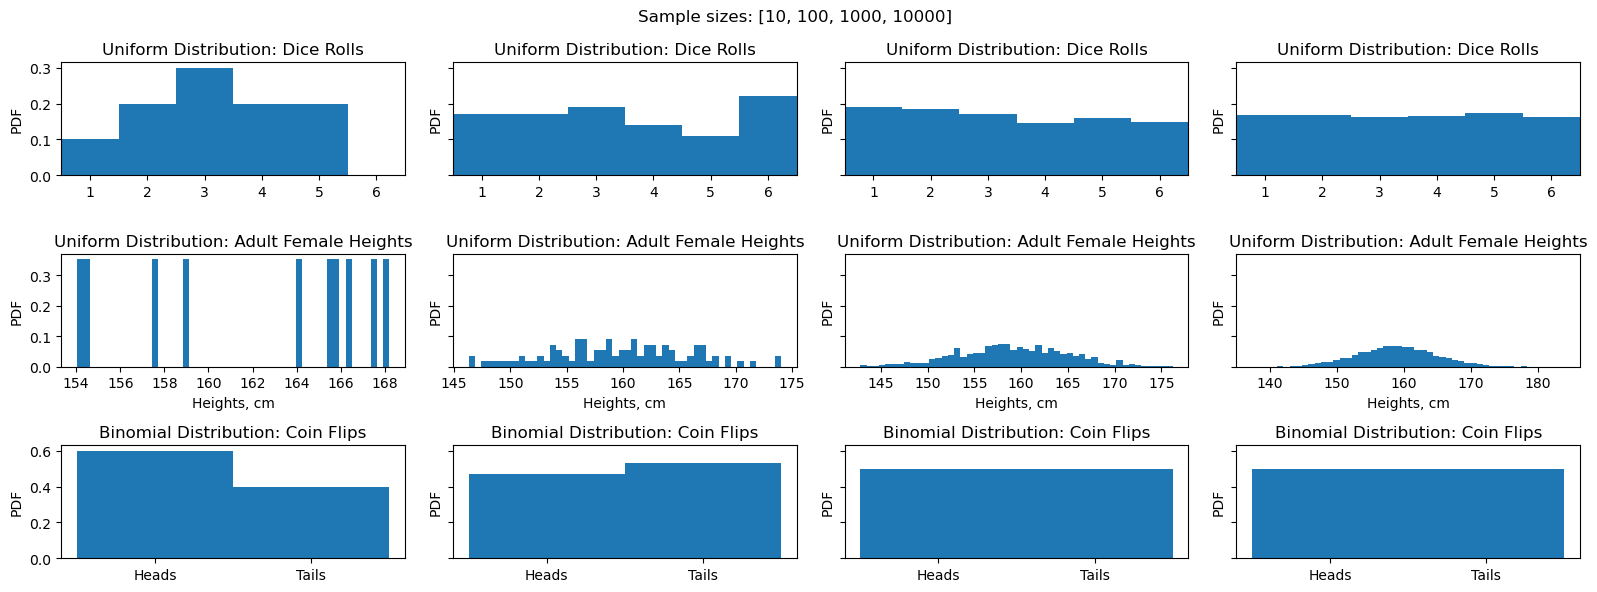

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n_vals = [10, 100,1000,10000]                       # sample size
fig, axes = plt.subplots(3,len(n_vals), 
                         figsize = (16,6), 
                         sharey="row", 
                         tight_layout=True)
fig.suptitle("Sample sizes: {}".format(n_vals))

for i in range(len(n_vals)):
    dice_rolls = np.random.randint(6, size=n_vals[i])   # Uniformly distributed dice rolls
    heights = 159+ 6*np.random.randn(n_vals[i])         # Normally distributed adult female heights, cm 
    coin_flips = np.random.binomial(1, 0.5, n_vals[i])  # Binomially distributed coin flips

    axes[0,i].hist(dice_rolls, density=True, bins=np.arange(-0.5,6.5,1))
    axes[0,i].set_xticks(np.arange(6), labels=np.arange(1,7))
    axes[0,i].set(xlim=[-0.5,5.5])
    axes[0,i].set_title("Uniform Distribution: Dice Rolls")
    axes[0,i].set_ylabel("PDF")

    axes[1,i].hist(heights, density=True, bins=50)
    axes[1,i].set_title("Uniform Distribution: Adult Female Heights")
    axes[1,i].set_ylabel("PDF")
    axes[1,i].set_xlabel("Heights, cm")

    axes[2,i].hist(coin_flips, density=True, bins=[-0.5,0.5,1.5])
    axes[2,i].set_xticks([0,1], labels=["Heads", "Tails"])
    axes[2,i].set_title("Binomial Distribution: Coin Flips")
    axes[2,i].set_ylabel("PDF")



### Q: What do you notice as the number of samples increases? 
Please comment on the qualitative shapes as well as the y values as n increases

### A: 
As the number of samples increases, results match the probability we expected.

## Monty Hall Problem
A classic statistical example is called the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). The idea is that you are on a gameshow and there is a car behind 1 of 3 doors. There is a goat behind each of the other 2 doors. You blindly choose 1 door that you think the car is behind. The host reveals one of the doors with a goat behind it. You can either stay with your initial choice or swap doors.

The following sections will discuss various methods we can use to analyze the possible outcomes (i.e. a win or loss).

We will start by solving this using brute force!

### Brute Force
Suppose you initially chose Door #1. We can tabulate all possible outcomes given that choice as follows:

|Behind Door 1 |Behind Door 2| Behind Door 3 |Stay with Door 1| Switch door|
|--|--|--|--|--|
|Goat| Goat| **Car**| Lose | *Win* |
|Goat| **Car**| Goat| Lose | *Win* |
|**Car**| Goat| Goat| *Win* | Lose |

### Q: Repeat this process but with initial choice Door 2 and Door 3

### A:

Initially choosing Door 2:

|Behind Door 1 |Behind Door 2| Behind Door 3 |Stay with Door 2| Switch door|
|--|--|--|--|--|
|Goat| Goat| **Car**| lose | win |
|Goat| **Car**| Goat| win | lose |
|**Car**| Goat| Goat| lose | win |

Initially choosing Door 3:

|Behind Door 1 |Behind Door 2| Behind Door 3 |Stay with Door 3| Switch door|
|--|--|--|--|--|
|Goat| Goat| **Car**| win | lose |
|Goat| **Car**| Goat| lose | win |
|**Car**| Goat| Goat| lose | win |

### Q: What is the probability of winning given each decision?

### A: 
a. Staying with your initial choice? 1/3

b. Switching your choice? 2/3

### Q: Does the chance of winning depend on the initial choice? Discuss why or why not.

### A: 
The chance of winning doesn't depend on the initial choice. Each table had the same pattern(2/3 chance if you switch, 1/3 chance if you stay)

## Monte Carlo Simulations
Monte Carlo simulations are based on the idea that you can converge on the distribution of outcomes with enough samples

Monte Carlo simulations are useful when you don't want to make assumptions about certain parameters. 

They can also be useful when you don't have intuition about the analytical solution.


### Q: Solve this using Monte Carlo simulations

### A:
Please uncomment and edit the skeleton code below as necessary

In [6]:

import numpy as np


def monty_hall_sim(num_mc : int, init_choice : int) -> tuple[list[float]]:
    """ 
    INPUTS
    num_mc: number of monte carlos to run
    init_choice: fixed initial door choice = [1,2,3]

    RETURNS
    outcome_keep: string array 
    """
    all_doors = [1,2,3]

    outcome_keep = np.zeros(num_mc)
    outcome_switch = np.zeros(num_mc)
    for i in range(num_mc):
        # Randomly choose a door for the prize to be behind
        prize_door = np.random.choice(all_doors)

        # Simulate outcomes: 
        # 1 = win, 0 = loss
        if prize_door == init_choice:
            outcome_keep[i] = 1
            outcome_switch[i] = 0
        else:
            outcome_keep[i] = 0
            outcome_switch[i] = 1
    
    return outcome_keep, outcome_switch

In [10]:
# HINT: play with num_mc to see the outputs with larger Monte Carlos
num_mc = 100000
outcome_keep, outcome_switch = monty_hall_sim(num_mc, 1)
print("Chance of winning given you STAY: {}%".format(sum(outcome_keep)/num_mc))
print("Chance of winning given you SWITCH: {}%".format(sum(outcome_switch)/num_mc))

Chance of winning given you STAY: 0.33396%
Chance of winning given you SWITCH: 0.66604%


## Bayesian Inference
Bayesian inference helps us make decisions *given* a particular condition is true. For the Monty Hall problem, we want the probability of winning the car *given* the car is not behind Door N.

Symbolically, we can define this in general as follows:

$$
P(A | B) = \frac{P(B|A) P(A)}{P(B)}
$$

In words:
$$P(A | B) = \text{conditional probability of A being true, given that B is true}$$
$$P(B| A) = \text{conditional probability of B being true, given that A is true}$$
$$P(A) = \text{marginal probability of A being true}$$
$$P(B) = \text{marginal probability of B being true}$$


### Q: Solve for the probability of winning if your initial choice = Door 1 and prize door = Door 2 using Bayes' theorem
Hint: we want to solve $P(\text{car is behind Door 1}  |  \text{car not behind Door 3})$

### A: 
$$P(B| A) = 1/2 $$
$$P(A) = 1/3 $$
$$P(B) = 1/2 $$

$$ \implies P(A | B) = \frac{P P(A)}(B|A){P(B)}  = (1/2)(1/3)/(1/2) $$